In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('income.csv')

In [3]:
df['income'] = df['income'].apply(lambda x: 0 if "<=50K" in x else 1)

In [5]:
dfencode = df.copy()
label = {}
for column in dfencode.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    dfencode[column] = le.fit_transform(dfencode[column])
    label[column] = le

In [6]:
X = dfencode.drop('income', axis=1)
y = dfencode['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train model
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(random_state=42)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
# Predictions
knn_pred = knn.predict(X_test)
dt_pred = dt.predict(X_test)
knn_proba = knn.predict_proba(X_test)[:, 1]
dt_proba = dt.predict_proba(X_test)[:, 1]
     

# Evaluation function
def evaluate_model(y_true, y_pred, y_proba, model_name):
    print(f"\n--- {model_name} ---")
    print(f"Akurasi  : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Presisi  : {precision_score(y_true, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_true, y_pred):.4f}")
    print(f"AUC ROC  : {roc_auc_score(y_true, y_proba):.4f}")

evaluate_model(y_test, knn_pred, knn_proba, "K-NN")
evaluate_model(y_test, dt_pred, dt_proba, "Decision Tree")


--- K-NN ---
Akurasi  : 0.7773
Presisi  : 0.5629
Recall   : 0.3401
F1 Score : 0.4240
AUC ROC  : 0.6855

--- Decision Tree ---
Akurasi  : 0.8095
Presisi  : 0.6032
Recall   : 0.6132
F1 Score : 0.6081
AUC ROC  : 0.7427


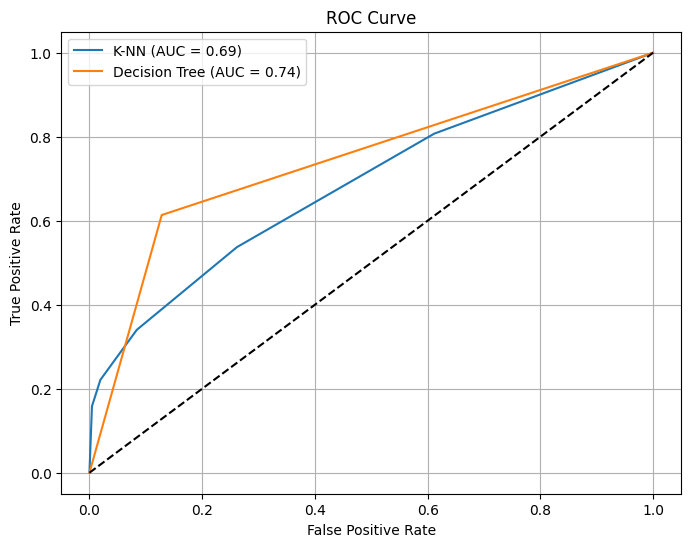

In [9]:
# Plot ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_proba)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label='K-NN (AUC = {:.2f})'.format(roc_auc_score(y_test, knn_proba)))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, dt_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

**Perbandingan Matriks Evaluasi (KNN vs Decision Tree)**
`Berikut adalah hasil evaluasi untuk kedua model:

**K-NN**

Akurasi: 0.7773

Presisi: 0.5629

Recall: 0.3401

F1 Score: 0.4240

AUC ROC: 0.6855

**Decision Tree**

Akurasi: 0.8095

Presisi: 0.6032

Recall: 0.6132

F1 Score: 0.6081

AUC ROC: 0.7427

Kesimpulan:
Decision Tree memiliki performa yang lebih baik dibandingkan K-NN berdasarkan semua metrik evaluasi.

Akurasi: Decision Tree lebih tinggi (0.8095 vs 0.7773), menunjukkan kemampuannya yang lebih baik dalam memprediksi kelas secara keseluruhan.

Presisi: Decision Tree lebih tinggi (0.6032 vs 0.5629), artinya lebih sedikit false positive (prediksi positif yang salah).

Recall: Decision Tree jauh lebih tinggi (0.6132 vs 0.3401), menunjukkan kemampuannya yang lebih baik dalam menemukan semua instance positif.

F1 Score: Decision Tree lebih tinggi (0.6081 vs 0.4240), menyeimbangkan presisi dan recall.

AUC ROC: Decision Tree lebih tinggi (0.7427 vs 0.6855), menunjukkan kemampuan klasifikasi yang lebih baik secara keseluruhan.

Alasan:
Decision Tree mungkin lebih cocok untuk dataset ini karena mampu menangkap hubungan non-linear antara fitur dan target. K-NN bisa kurang optimal jika data memiliki noise atau fitur yang tidak relevan.`

**Penjelasan Persamaan Matematika**
  Berikut penjelasan untuk setiap metrik evaluasi yang digunakan:

  a. Akurasi (Accuracy)
  
  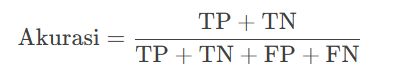

   - TP (True Positive): Prediksi benar kelas positif.

   - TN (True Negative): Prediksi benar kelas negatif.

   - FP (False Positive): Prediksi salah kelas positif.

   - FN (False Negative): Prediksi salah kelas negatif.

   - Interpretasi: Persentase prediksi yang benar dari total prediksi.

  b. Presisi (Precision)
  
  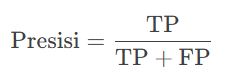

  - Interpretasi: Proporsi prediksi positif yang benar. Tinggi jika sedikit false positive.

  c. Recall (Sensitivity)

  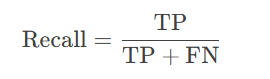

  - Interpretasi: Proporsi instance positif yang terdeteksi. Tinggi jika sedikit false negative.

  d. F1 Score

  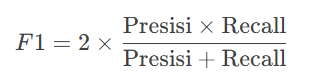

  - Interpretasi: Rata-rata harmonik presisi dan recall. Berguna jika kelas tidak seimbang.

  e. AUC-ROC (Area Under Curve - Receiver Operating Characteristic)
  - ROC Curve: Plot True Positive Rate (Recall) vs False Positive Rate (FPR = FP / (FP + TN)).

  - AUC: Luas di bawah kurva ROC. Nilai 1 = sempurna, 0.5 = acak.

  - Interpretasi: Kemampuan model membedakan kelas positif dan negatif.

  f. ROC Curve
  Dibuat dengan memvariasikan threshold klasifikasi dan menghitung TPR vs FPR.